In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("../..")
print("at directory:", os.getcwd())

at directory: /Users/wilka/git/research/jaxneurorl/projects/humansf
changing to root directory
at directory: /Users/wilka/git/research/jaxneurorl


In [21]:
import jax
import jax.tree_util as jtu
import jax.numpy as jnp
import os.path
import numpy as np

import matplotlib.pyplot as plt


from projects.humansf import housemaze_trainer as trainer
import housemaze
from housemaze import levels
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import multitask_env
from housemaze.human_dyna import mazes

In [12]:
# rendering fns
def display_image(image):
    # Create a new figure and axis
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.tight_layout()
    plt.show()

def render_timestep(timestep):
    image = renderer.create_image_from_grid(
        timestep.state.grid,
        timestep.state.agent_pos,
        timestep.state.agent_dir,
        image_dict)
    plt.imshow(image)
    plt.show()

No file specified for image dict.
Using: /Users/wilka/git/research/jaxneurorl/libraries/housemaze/housemaze/image_data.pkl


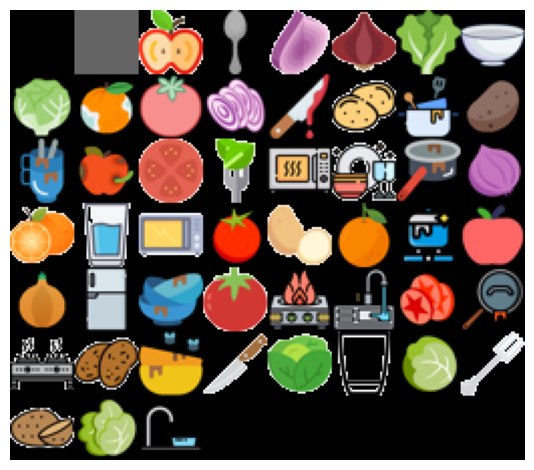

((224, 256, 3),
 ['empty', 'wall', 'apple_sliced', 'spoon', 'onion_sliced_cooked'])

In [14]:
# load images and display them
image_dict = utils.load_image_dict()
image = renderer.create_image_grid_from_image_tensor(image_dict['images'], max_cols=8)
display_image(image)
image.shape, image_dict['keys'][:5]

In [23]:
char2idx, groups, task_objects = mazes.get_group_set(2)
task_runner = multitask_env.TaskRunner(task_objects=task_objects)


No file specified for groups.
Using: /Users/wilka/git/research/jaxneurorl/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


In [25]:
task_objects = groups.reshape(-1)
task_objects

array([26, 40, 47, 43], dtype=int32)

In [26]:
seed = 7
rng = jax.random.PRNGKey(seed)

task_runner = env.TaskRunner(
    task_objects=task_objects)
env = housemaze_env.HouseMaze(
    task_runner=task_runner,
    num_categories=len(image_dict['keys']),
)
env = utils.AutoResetWrapper(env)

reset_timestep = env.reset(rng, env_params)
render_timestep(reset_timestep)


NameError: name 'housemaze_env' is not defined

In [10]:
reset_timestep.state.agent_pos, reset_timestep.state.agent_dir, env_params.time_limit

(Array([8, 5], dtype=int32), Array(0, dtype=int32), 100)

In [11]:
# test that
timestep = reset_timestep

for idx in range(200):
    timestep = env.step(rng, timestep, a, env_params)
    print(f'{idx}: reward:', timestep.reward, '| terminal:', timestep.last())
render_timestep(timestep)

NameError: name 'a' is not defined

In [ ]:
# test that
timestep = reset_timestep

for a in [
    maze.KeyboardActions.left,
    maze.KeyboardActions.down,
]:
    timestep = env.step(rng, timestep, a, env_params)
    print('reward:', timestep.reward, '| terminal:', timestep.last())
    render_timestep(timestep)
